# 1. 데이터 불러오기

In [1]:
import os
os.chdir('C:/Users/hu612/Desktop/School/수DA쟁이/Project/개인과제/data')

In [2]:
import pandas as pd
import numpy as np

train=pd.read_csv('train_features.csv')
train_labels=pd.read_csv('train_labels.csv')
test=pd.read_csv('test_features.csv')
submission=pd.read_csv('sample_submission.csv')

# 2. 데이터 살펴보기

In [3]:
train_labels.shape

(3125, 3)

In [4]:
train.head()

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234


In [5]:
test.head()

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,3125,0,-0.628100,-0.160155,0.151487,49.665357,88.435961,13.597668
1,3125,1,-0.462548,0.012462,-0.053726,56.953059,96.185341,16.278458
2,3125,2,-0.363481,-0.091789,-0.130004,29.557396,93.836453,13.329043
3,3125,3,-0.351750,-0.239870,-0.193053,23.686172,88.608721,13.449771
4,3125,4,-0.312934,-0.123762,-0.318621,20.410071,85.327707,13.884912


In [6]:
train_labels.head()

,id,label,label_desc
0,0,37,Shoulder Press (dumbbell)
1,1,26,Non-Exercise
2,2,3,Biceps Curl (band)
3,3,26,Non-Exercise
4,4,26,Non-Exercise


In [7]:
train.shape

(1875000, 8)

In [8]:
train['id'].value_counts()

2047    600
1347    600
2378    600
1354    600
2379    600
       ... 
1699    600
675     600
2722    600
1698    600
0       600
Name: id, Length: 3125, dtype: int64

In [9]:
train_id = train['id']

train_id[train_id==2].count

<bound method Series.count of 1200    2
1201    2
1202    2
1203    2
1204    2
       ..
1795    2
1796    2
1797    2
1798    2
1799    2
Name: id, Length: 600, dtype: int64>

<AxesSubplot:>

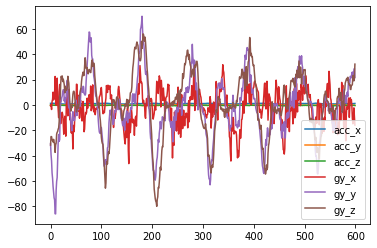

In [10]:
# id 별 동작들의 흐름 살펴보기

# id = 0 이면 Siulder Press(dumbell)
ex = train[train['id']==0]

ex.iloc[:,2:].plot()

In [11]:
train_labels[train_labels['id']==0]

,id,label,label_desc
0,0,37,Shoulder Press (dumbbell)


<AxesSubplot:>

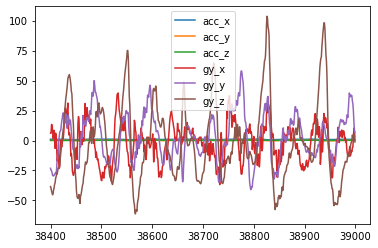

In [12]:
ex = train[train['id']==64]

ex.iloc[:,2:].plot()

<AxesSubplot:>

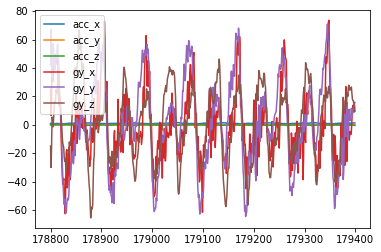

In [13]:
ex = train[train['id']==298]

ex.iloc[:,2:].plot()

<AxesSubplot:>

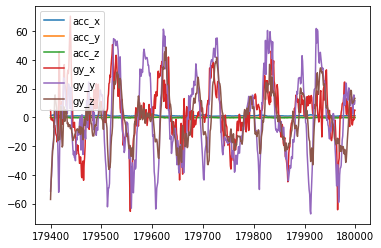

In [14]:
ex = train[train['id']==299]

ex.iloc[:,2:].plot()

<AxesSubplot:>

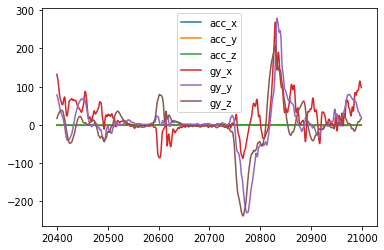

In [15]:
ex = train[train['id']==34]

ex.iloc[:,2:].plot()

In [16]:
train_labels['label_desc'].unique

<bound method Series.unique of 0                Shoulder Press (dumbbell)
1                             Non-Exercise
2                       Biceps Curl (band)
3                             Non-Exercise
4                             Non-Exercise
                       ...                
3120                          Non-Exercise
3121                          Non-Exercise
3122    Dynamic Stretch (at your own pace)
3123                          Non-Exercise
3124                            Bicep Curl
Name: label_desc, Length: 3125, dtype: object>

<AxesSubplot:>

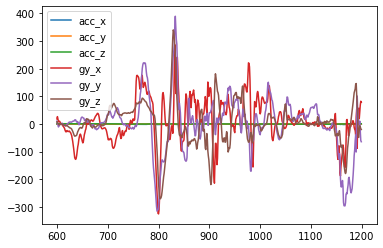

In [17]:
#운동이 아니래영,, 머쓱 ,,
ex = train[train['id']==1]

ex.iloc[:,2:].plot()

In [18]:
train.isnull().sum() # 클린하노

id       0
time     0
acc_x    0
acc_y    0
acc_z    0
gy_x     0
gy_y     0
gy_z     0
dtype: int64

In [19]:
train_labels

,id,label,label_desc
0,0,37,Shoulder Press (dumbbell)
1,1,26,Non-Exercise
2,2,3,Biceps Curl (band)
3,3,26,Non-Exercise
4,4,26,Non-Exercise
...,...,...,...
3120,3120,26,Non-Exercise
3121,3121,26,Non-Exercise
3122,3122,15,Dynamic Stretch (at your own pace)
3123,3123,26,Non-Exercise


In [20]:
train_labels['label'].unique()

array([37, 26,  3, 39, 28,  6, 60, 35, 34, 30, 59, 15, 40, 50, 48,  8, 54,
       16,  4, 58, 21, 18, 51, 25, 24, 17, 49, 47, 27, 36,  2, 38, 14, 10,
       55, 57,  0,  1, 46, 43, 52, 53,  5, 56, 23, 44, 42, 19, 32, 45, 29,
       31, 11,  7, 41, 12,  9, 20, 13, 22, 33], dtype=int64)

In [21]:
a = train_labels['label'].unique()

In [22]:
a.sort()

In [23]:
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60], dtype=int64)

In [24]:
b = pd.Series(train_labels['label'])

In [25]:
b

0       37
1       26
2        3
3       26
4       26
        ..
3120    26
3121    26
3122    15
3123    26
3124     2
Name: label, Length: 3125, dtype: int64

In [26]:
b.value_counts() # 히이이이익 엄청 많네

26    1518
8       97
28      55
60      48
18      47
      ... 
53      13
52      12
13      12
12      12
0       12
Name: label, Length: 61, dtype: int64

In [27]:
b1 = b[b==26].index

In [28]:
b_1 = b.drop(b1)

In [29]:
c = pd.Series(train_labels['label_desc'])

In [30]:
c

0                Shoulder Press (dumbbell)
1                             Non-Exercise
2                       Biceps Curl (band)
3                             Non-Exercise
4                             Non-Exercise
                       ...                
3120                          Non-Exercise
3121                          Non-Exercise
3122    Dynamic Stretch (at your own pace)
3123                          Non-Exercise
3124                            Bicep Curl
Name: label_desc, Length: 3125, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60]),
 [Text(0, 0, 'Shoulder Press (dumbbell)'),
  Text(1, 0, 'Non-Exercise'),
  Text(2, 0, 'Biceps Curl (band)'),
  Text(3, 0, 'Side Plank Right side'),
  Text(4, 0, 'Plank'),
  Text(5, 0, 'Chest Press (rack)'),
  Text(6, 0, 'Wall Squat'),
  Text(7, 0, 'Russian Twist'),
  Text(8, 0, 'Running (treadmill)'),
  Text(9, 0, 'Pushup (knee or foot variation)'),
  Text(10, 0, 'Wall Ball'),
  Text(11, 0, 'Dynamic Stretch (at your own pace)'),
  Text(12, 0, 'Sit-up (hands positioned behind head)'),
  Text(13, 0, 'Tap Right Device'),
  Text(14, 0, 'Static Stretch (at your own pace)'),
  Text(15, 0, 'Device on Table'),
  Text(16, 0, 'Triceps extension (lying down)'),
  Text(17, 0, 'Elliptical machine'),
  Text(18, 0, 'Burpee'),
 

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


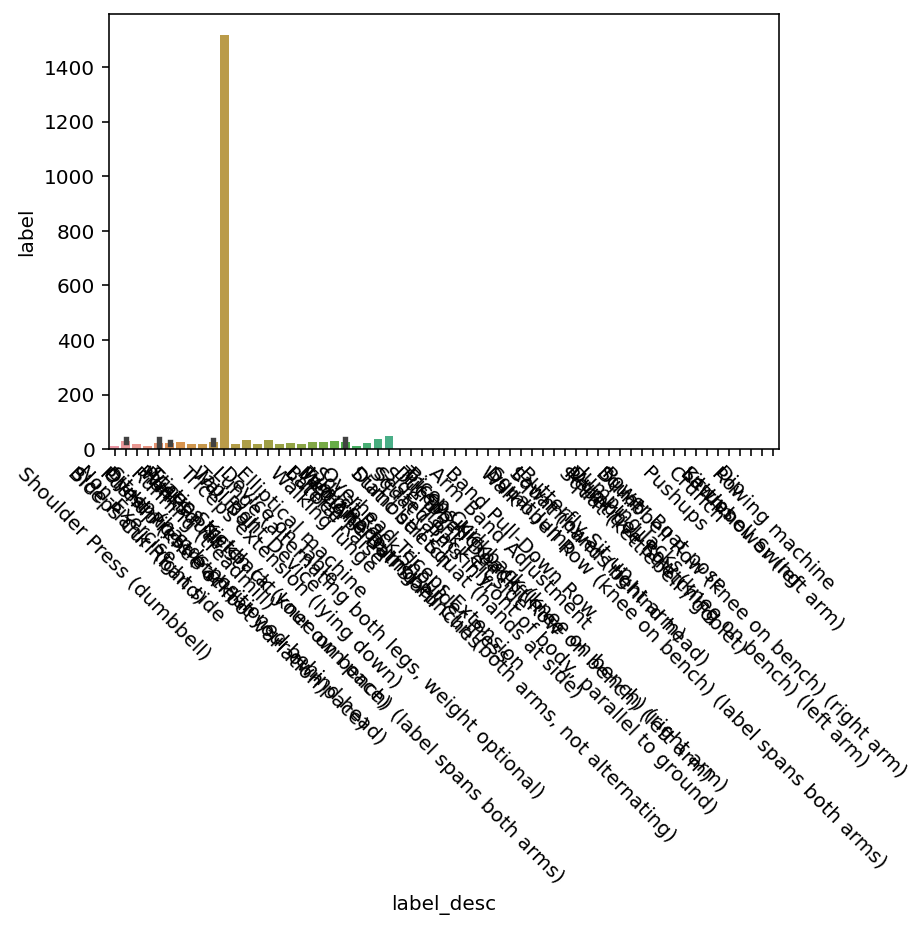

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%config InlineBackend.figure_format = 'retina'
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 






sns.barplot(x = train_labels['label_desc'], y = b.value_counts())
plt.xticks(rotation=-45)

In [32]:
x1 = train_labels[train_labels['label_desc']=='Non-Exercise'].index

In [33]:
x1

Int64Index([   1,    3,    4,    5,    6,    7,    8,    9,   10,   11,
            ...
            3105, 3106, 3107, 3112, 3113, 3114, 3116, 3120, 3121, 3123],
           dtype='int64', length=1518)

In [34]:
x_1 = train_labels.drop(x1)

In [35]:
x_1

,id,label,label_desc
0,0,37,Shoulder Press (dumbbell)
2,2,3,Biceps Curl (band)
12,12,39,Side Plank Right side
13,13,28,Plank
20,20,6,Chest Press (rack)
...,...,...,...
3117,3117,60,Wall Squat
3118,3118,53,Triceps Kickback (knee on bench) (right arm)
3119,3119,17,Fast Alternating Punches
3122,3122,15,Dynamic Stretch (at your own pace)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 [Text(0, 0, 'Shoulder Press (dumbbell)'),
  Text(1, 0, 'Biceps Curl (band)'),
  Text(2, 0, 'Side Plank Right side'),
  Text(3, 0, 'Plank'),
  Text(4, 0, 'Chest Press (rack)'),
  Text(5, 0, 'Wall Squat'),
  Text(6, 0, 'Russian Twist'),
  Text(7, 0, 'Running (treadmill)'),
  Text(8, 0, 'Pushup (knee or foot variation)'),
  Text(9, 0, 'Wall Ball'),
  Text(10, 0, 'Dynamic Stretch (at your own pace)'),
  Text(11, 0, 'Sit-up (hands positioned behind head)'),
  Text(12, 0, 'Tap Right Device'),
  Text(13, 0, 'Static Stretch (at your own pace)'),
  Text(14, 0, 'Device on Table'),
  Text(15, 0, 'Triceps extension (lying down)'),
  Text(16, 0, 'Elliptical machine'),
  Text(17, 0, 'Burpee'),
  Text(18, 0, 'Walking lunge'),
  Te

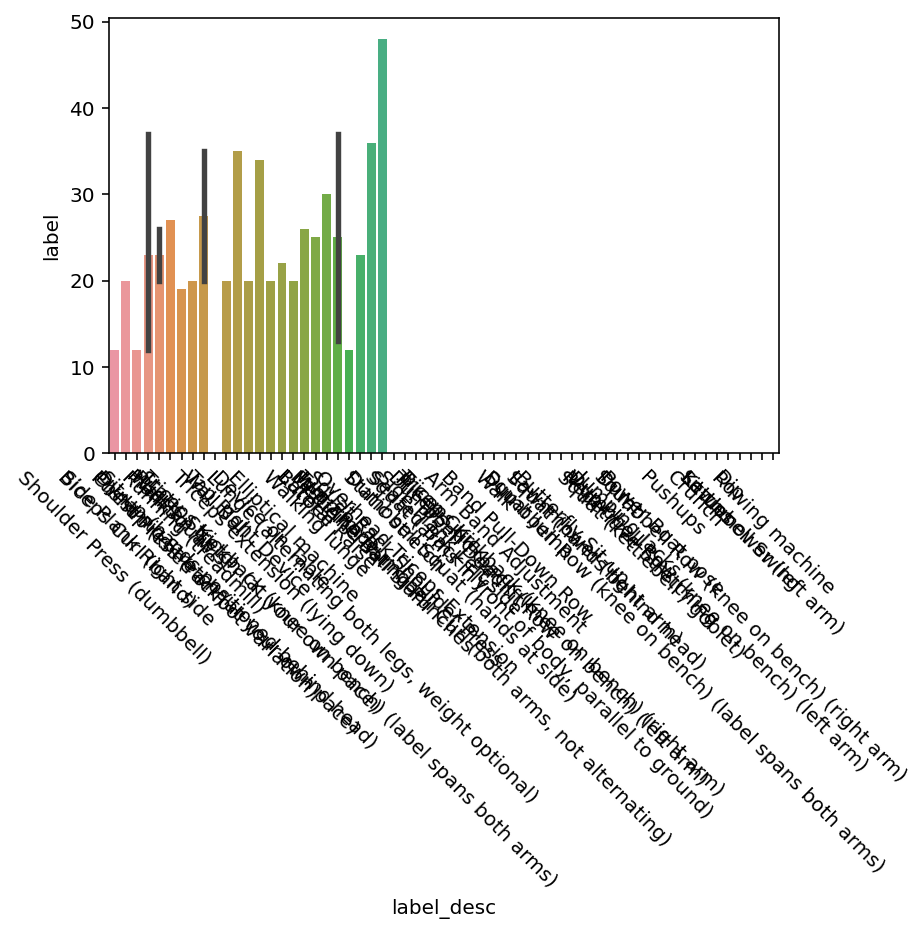

In [36]:
sns.barplot(x = x_1['label_desc'], y = b_1.value_counts())
plt.xticks(rotation=-45)

In [37]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3125 entries, 0 to 3124
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          3125 non-null   int64 
 1   label       3125 non-null   int64 
 2   label_desc  3125 non-null   object
dtypes: int64(2), object(1)
memory usage: 73.4+ KB


# 데이터 나누기

In [41]:
import tensorflow as tf

In [38]:
X_train = train[(train['id']>= 0) & (train['id']<=2499)]

In [54]:
X_train.shape

TensorShape([2500, 600, 6])

In [39]:
X_test = train[train['id'] >= 2500]

In [42]:
X_train = tf.reshape(np.array(X_train.iloc[:,2:]),[-1, 600, 6])

In [43]:
X_test = tf.reshape(np.array(X_test.iloc[:,2:]),[-1, 600, 6])

In [45]:
from tensorflow.keras.utils import to_categorical
y =  to_categorical(train_labels['label'])

In [47]:
y.shape

(3125, 61)

In [48]:
slice_arr = slice(0,2500,1)
y_train = y[slice_arr]

In [49]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [50]:
y_train.shape

(2500, 61)

In [51]:
slice_arr2 = slice(2500,3125,1)
y_test = y[slice_arr2]

In [52]:
y_test.shape

(625, 61)

In [88]:
y_train = tf.reshape(y_train[-1, 600, 61])

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [53]:
print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)

(2500, 61)
(2500, 600, 6)
(625, 61)
(625, 600, 6)


In [89]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping
 
from keras.layers import Dense, LSTM

#가벼운 모델 생성
model = Sequential()
model.add(LSTM(32,input_shape=(600,6),return_sequences = False))
model.add(Dense(128, activation='relu'))
model.add(Dense(61, activation='softmax'))
 

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [90]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 32)                4992      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_9 (Dense)              (None, 61)                7869      
Total params: 17,085
Trainable params: 17,085
Non-trainable params: 0
_________________________________________________________________


In [91]:
model.fit(X_train,y_train,batch_size=128, epochs =  30,validation_split=0.2) #steps_per_epoch=128

Epoch 1/30
16/16 [==============================] - 14s 606ms/step - loss: 3.9265 - accuracy: 0.1721 - val_loss: 3.5269 - val_accuracy: 0.4780
Epoch 2/30
16/16 [==============================] - 9s 554ms/step - loss: 3.3879 - accuracy: 0.4785 - val_loss: 3.0472 - val_accuracy: 0.4860
Epoch 3/30
16/16 [==============================] - 9s 560ms/step - loss: 2.9585 - accuracy: 0.4760 - val_loss: 2.7922 - val_accuracy: 0.4860
Epoch 4/30
16/16 [==============================] - 9s 573ms/step - loss: 2.7377 - accuracy: 0.4832 - val_loss: 2.7077 - val_accuracy: 0.4860
Epoch 5/30
16/16 [==============================] - 9s 534ms/step - loss: 2.6350 - accuracy: 0.4871 - val_loss: 2.6617 - val_accuracy: 0.4860
Epoch 6/30
16/16 [==============================] - 9s 548ms/step - loss: 2.6619 - accuracy: 0.4631 - val_loss: 2.6191 - val_accuracy: 0.4860
Epoch 7/30
16/16 [==============================] - 9s 561ms/step - loss: 2.6090 - accuracy: 0.4669 - val_loss: 2.5871 - val_accuracy: 0.4880
Epoch

In [92]:
y_pred=model.predict(X_test) #steps=1)

In [121]:
np.argmax(y_pred[143])

26

In [124]:
np.argmax(y_test[3])

25

In [103]:
y2 = train_labels['label']

In [104]:
slice_arr2 = slice(2500,3125,1)
y_test2 = y2[slice_arr2]

In [106]:
y_test2 = np.array(y_test2)

In [108]:
y_test2.shape

(625,)

In [183]:
y_pred.shape

(625, 61)

In [66]:
len(y_pred[624])

61

In [67]:
y_pred1 = list(y_pred)

In [68]:
b = []

for a in range(0,625,1) :
    for i in range(0,61,1) :
        if (i == np.argmax(y_pred1[a])) : 
            y_pred1[a][i] = 1
        else :
            y_pred1[a][i] = 0

In [73]:
y_pred

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [74]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [72]:
print("/n Accuracy : %.4f" % (model.evaluate(y_test, y_pred)))

ValueError: in user code:

    C:\Users\hu612\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1233 test_function  *
        return step_function(self, iterator)
    C:\Users\hu612\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1224 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\hu612\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\hu612\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\hu612\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\hu612\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1217 run_step  **
        outputs = model.test_step(data)
    C:\Users\hu612\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1183 test_step
        y_pred = self(x, training=False)
    C:\Users\hu612\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\hu612\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:219 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 61)


# 20210116"

In [210]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping
 
from keras.layers import Dense, LSTM

#가벼운 모델 생성
model = Sequential()
model.add(LSTM(32, input_shape=(600,6)))
model.add(Dropout(0.01))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(61, activation='softmax'))
 

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [211]:
model.fit(X_train,y_train,steps_per_epoch=128, epochs =  30)#validation_step=0.2)

Epoch 1/30
128/128 [==============================] - 183s 1s/step - loss: 2.5513 - accuracy: 0.4814
Epoch 2/30
128/128 [==============================] - 181s 1s/step - loss: 1.7793 - accuracy: 0.5536
Epoch 3/30
128/128 [==============================] - 181s 1s/step - loss: 1.3495 - accuracy: 0.6335
Epoch 4/30
128/128 [==============================] - 180s 1s/step - loss: 1.0413 - accuracy: 0.7054
Epoch 5/30
128/128 [==============================] - 181s 1s/step - loss: 0.8052 - accuracy: 0.7655
Epoch 6/30
128/128 [==============================] - 181s 1s/step - loss: 0.6104 - accuracy: 0.8229
Epoch 7/30
128/128 [==============================] - 181s 1s/step - loss: 0.4643 - accuracy: 0.8721
Epoch 8/30
128/128 [==============================] - 182s 1s/step - loss: 0.3608 - accuracy: 0.9079
Epoch 9/30
128/128 [==============================] - 181s 1s/step - loss: 0.3080 - accuracy: 0.9244
Epoch 10/30
128/128 [==============================] - 179s 1s/step - loss: 0.2520 - accura

In [212]:
y_pred=model.predict(X_test, steps=1)

In [213]:
b = []

for a in range(0,625,1) :
    for i in range(0,61,1) :
        if (i == np.argmax(y_pred1[a])) : 
            y_pred1[a][i] = 1
        else :
            y_pred1[a][i] = 0

In [215]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

from sklearn.metrics import classification_report
print(accuracy_score(y_test, y_pred))

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets